In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

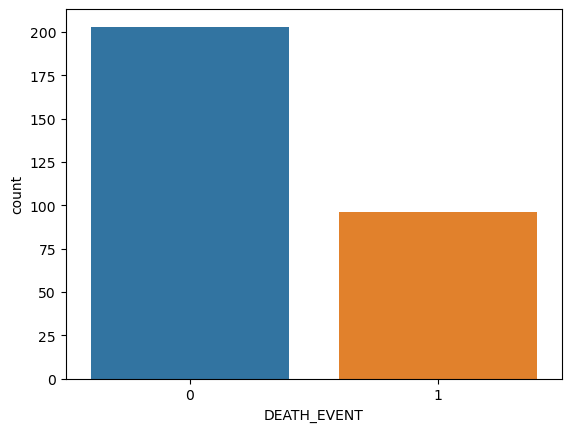

In [4]:
sns.countplot(x ='DEATH_EVENT', data = df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

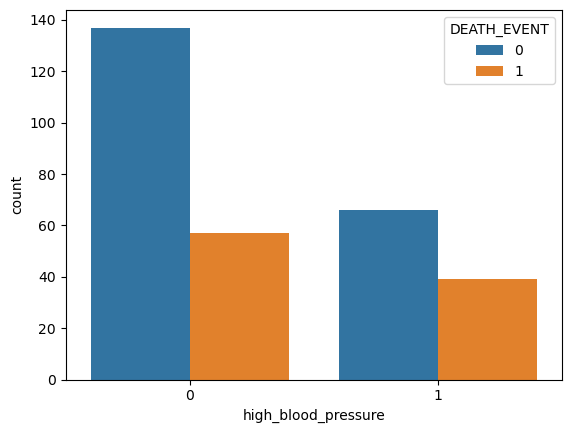

In [5]:
sns.countplot(x ='high_blood_pressure', data = df, hue='DEATH_EVENT' )

<AxesSubplot:xlabel='diabetes', ylabel='count'>

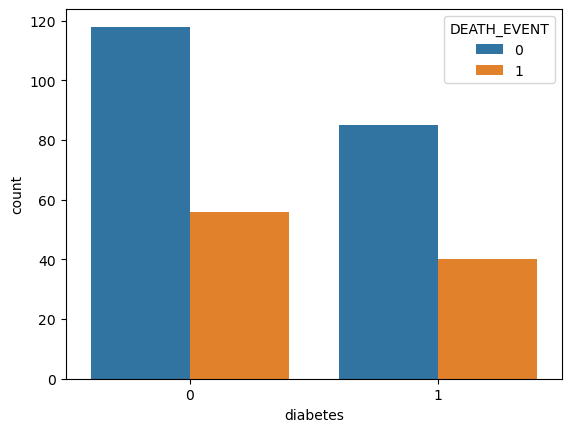

In [6]:
sns.countplot(x ='diabetes', data = df, hue='DEATH_EVENT' )

<AxesSubplot:xlabel='anaemia', ylabel='count'>

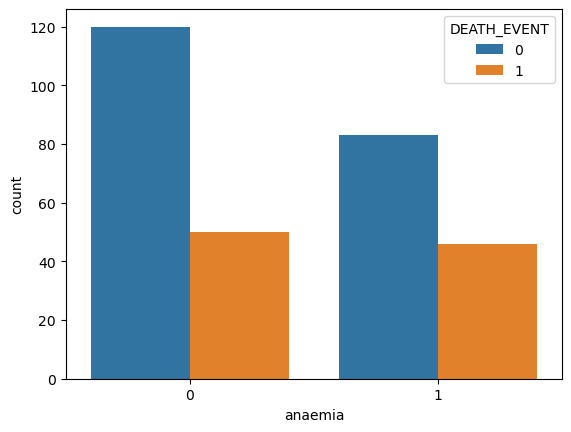

In [7]:
sns.countplot(x ='anaemia', data = df, hue='DEATH_EVENT' )

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('DEATH_EVENT', axis =1), df[['DEATH_EVENT']], random_state=1, train_size=.70)

In [10]:
xtrain.shape

(209, 12)

In [11]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126


In [12]:
xtest.shape

(90, 12)

In [13]:
ytest.shape

(90, 1)

In [14]:
ytest.head()

,DEATH_EVENT
173,0
287,0
51,1
146,0
214,0


In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [16]:
dt.fit(xtrain, ytrain) #training done

DecisionTreeClassifier()

In [17]:
pred = dt.predict(xtrain) #training accuracy
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [18]:
ytrain.head()

,DEATH_EVENT
14,0
210,0
236,0
44,1
163,1


In [19]:
ytrain['Pred'] = pred

In [20]:
ytrain.head(10)

,DEATH_EVENT,Pred
14,0,0
210,0,0
236,0,0
44,1,1
163,1,1
292,0,0
117,0,0
258,0,0
41,1,1
79,0,0


In [21]:
ytrain.tail(20)

,DEATH_EVENT,Pred
241,0,0
215,0,0
68,1,1
50,1,1
156,0,0
252,0,0
254,0,0
276,0,0
178,0,0
281,0,0


In [22]:
dt.score(xtrain, ytrain['DEATH_EVENT'])

1.0

In [23]:
pred2 = dt.predict(xtest)
pred2 #testing result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [24]:
dt.score(xtest, ytest)

0.8111111111111111

In [25]:
ytest['pred2'] = pred2
ytest

,DEATH_EVENT,pred2
173,0,0
287,0,0
51,1,0
146,0,0
214,0,0
...,...,...
122,0,0
246,1,0
278,0,0
251,0,0


# confusion Matrix

In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,plot_roc_curve

In [27]:
classification_report(ytest['DEATH_EVENT'], pred2)

'              precision    recall  f1-score   support\n\n           0       0.84      0.91      0.87        64\n           1       0.71      0.58      0.64        26\n\n    accuracy                           0.81        90\n   macro avg       0.78      0.74      0.76        90\nweighted avg       0.80      0.81      0.80        90\n'

In [28]:
print(classification_report(ytest['DEATH_EVENT'], pred2))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        64
           1       0.71      0.58      0.64        26

    accuracy                           0.81        90
   macro avg       0.78      0.74      0.76        90
weighted avg       0.80      0.81      0.80        90



In [29]:
cm=confusion_matrix(ytest['DEATH_EVENT'], pred2)
cm

array([[58,  6],
       [11, 15]], dtype=int64)

<AxesSubplot:>

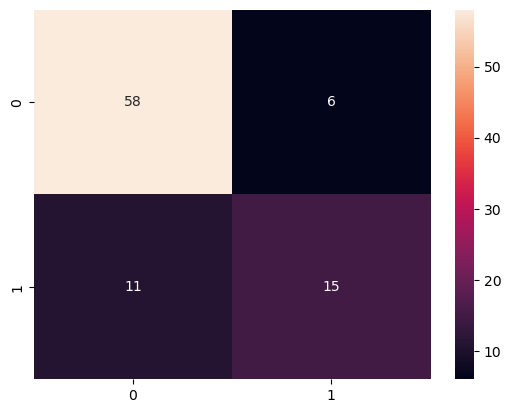

In [30]:
sns.heatmap(cm, annot=True)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest['DEATH_EVENT'], pred2)

0.8111111111111111

In [32]:
dt.score(xtest, ytest['DEATH_EVENT'])

0.8111111111111111

In [33]:
confusion_matrix(ytest['DEATH_EVENT'], pred2).reshape(-1)

array([58,  6, 11, 15], dtype=int64)

In [34]:
tp, fp, fn, tn = confusion_matrix(ytest['DEATH_EVENT'], pred2).reshape(-1)

In [35]:
tp

58

In [36]:
fp

6

In [37]:
fn

11

In [38]:
tn

15

In [39]:
acc = (tp+tn)/(tp+fp+fn+tn)

In [40]:
acc

0.8111111111111111

# assignment

# Precision or Positive Predictive Value (PPV)

In [41]:
#PPV = True Positive / (True Positive + False Positive)
#Precision = tp / ( tp + fp )

In [42]:
ppv = tp / ( tp + fp )

In [43]:
ppv

0.90625

# Sensitivity, Recall, Hit Rate, or True Positive Rate (TPR)

In [44]:
#TPR = True Positive / (True Positive + False Negative)

In [45]:
tpr = tp / (tp + fn)

In [46]:
tpr

0.8405797101449275

# False Positive Rate (FPR) or 1-Specificity

In [47]:
#FPR = False Positive / (False Positive + True Negative)

In [48]:
fdr = fp / (fp + tn)

In [49]:
fdr

0.2857142857142857

# Specificity, Selectivity or True Negative Rate (TNR)

In [50]:
#Specificity = True Negative / (True Negative + False Positive)

In [51]:
tnr = tn / (tn + fp)

In [52]:
tnr

0.7142857142857143

# Threat Score (TS) or Critical Success Index (CSI)

In [53]:
#TS/CSI = True Positive / (True Positive + False Negative + False Positive )

In [54]:
ts = tp / (tp + fn + fp)

In [55]:
ts

0.7733333333333333

# False Discovery Rate (FDR)

In [56]:
#False Discovery Rate = False Positive / (True Positive + False Positive )

In [57]:
fdr = fp / (tp + fp)

In [58]:
fdr

0.09375

# Harmonic Mean, F-Measure

In [59]:
# F-measure: harmonic mean of recall and precision =( 2 * Precision or ppv * Recall or tpr ) / (Precision or ppv + Recall or tpr)

In [60]:
f_measure = (2*ppv*tpr) / (ppv + tpr)

In [61]:
f_measure

0.8721804511278196

# ROC & AUC Curve

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


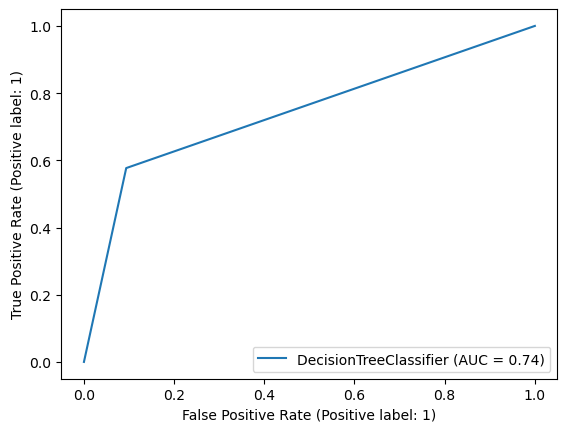

In [62]:
plot_roc_curve(dt, xtest, ytest['DEATH_EVENT'])

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


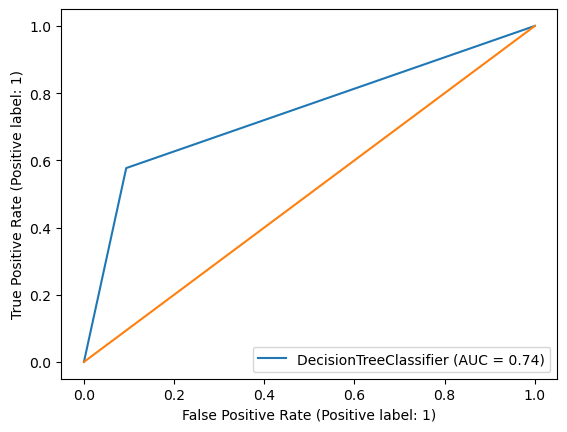

In [63]:
plot_roc_curve(dt, xtest, ytest['DEATH_EVENT'])
plt.plot([0,1], [0,1])